In [2]:
# !pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [4]:
np.random.seed(777)

In [5]:
df = pd.read_csv('data/students.csv')

In [6]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [7]:
len(df.index)

4424

In [8]:
X = df.loc[:, df.columns != 'Target']
y = df['Target']

In [9]:
classes = ['Dropout', 'Graduate', 'Enrolled']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=777)

In [11]:
X_train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,...,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,1.179712,6.894886,1.719695,9.868324,0.891777,2.571913,1.249223,12.295846,16.485730,7.296411,...,0.130828,0.539418,6.223509,8.054818,4.423566,10.226210,0.145521,11.585476,1.226618,-0.002142
std,0.610281,5.306728,1.311119,4.346452,0.310705,4.009614,1.733045,9.067788,11.028049,3.995548,...,0.667934,1.913864,2.193843,3.951421,3.009598,5.226452,0.743933,2.672804,1.381857,2.267525
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.375000,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,20.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3539 entries, 1072 to 1939
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3539 non-null   int64  
 1   Application mode                                3539 non-null   int64  
 2   Application order                               3539 non-null   int64  
 3   Course                                          3539 non-null   int64  
 4   Daytime/evening attendance                      3539 non-null   int64  
 5   Previous qualification                          3539 non-null   int64  
 6   Nacionality                                     3539 non-null   int64  
 7   Mother's qualification                          3539 non-null   int64  
 8   Father's qualification                          3539 non-null   int64  
 9   Mother's occupation                        

In [13]:
nominais = ['Marital status', 
            'Application mode', 
            'Course',
            'Daytime/evening attendance', 
            'Previous qualification', 
            'Nacionality',
            'Mother\'s qualification', 
            'Father\'s qualification',
            'Mother\'s occupation', 
            'Father\'s occupation', 
            'Displaced',
            'Educational special needs', 
            'Debtor', 
            'Tuition fees up to date',
            'Gender', 
            'Scholarship holder', 
            'International',
            'Curricular units 1st sem (credited)',
            'Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)',
            'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)',
            'Curricular units 2nd sem (evaluations)',
            'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)',
            'Curricular units 2nd sem (without evaluations)', 
            'Unemployment rate',
            'Inflation rate', 
            'GDP']        

ordinais = ['Application order']      

razao = ['Age at enrollment',
         'Curricular units 1st sem (credited)',
         'Curricular units 1st sem (enrolled)',
         'Curricular units 1st sem (evaluations)',
         'Curricular units 1st sem (approved)',
         'Curricular units 1st sem (grade)',
         'Curricular units 1st sem (without evaluations)',
         'Curricular units 2nd sem (credited)',
         'Curricular units 2nd sem (enrolled)',
         'Curricular units 2nd sem (evaluations)',
         'Curricular units 2nd sem (approved)',
         'Curricular units 2nd sem (grade)',
         'Curricular units 2nd sem (without evaluations)',
         'Unemployment rate',
         'Inflation rate', 
         'GDP']

## plottando distribuições

In [14]:
def plot_freq(df: pd.DataFrame, col_name: str, legend_df: pd.DataFrame, plt: plt) -> None:
    df_col = df[col_name]
    legend_df.columns = [col_name, 'value']
    merge_df_legend = pd.merge(df_col, legend_df, on=col_name, how='inner')
    merge_df_legend = merge_df_legend[['value']].apply(lambda x: x.str.slice(0, 20))
    plt.figure(figsize=(10, 6))
    freq = merge_df_legend['value'].value_counts().nlargest(10)
    freq.plot(kind='bar', color='skyblue')
    plt.title('suco')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=-45)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.show()

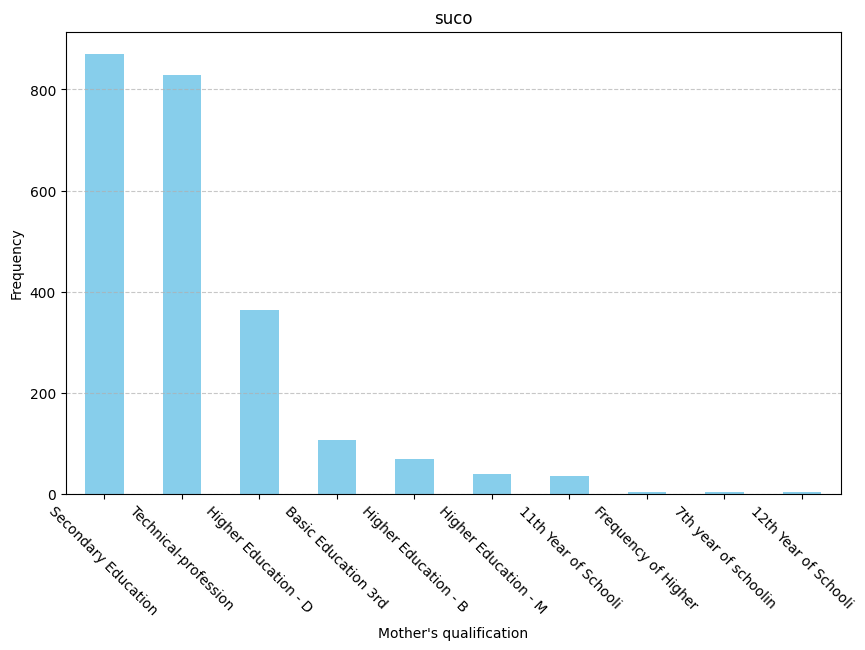

In [15]:
mother_quali_legend = pd.read_csv('data/decode/mother_quali.csv')

plot_freq(X_train, 'Mother\'s qualification', mother_quali_legend, plt)

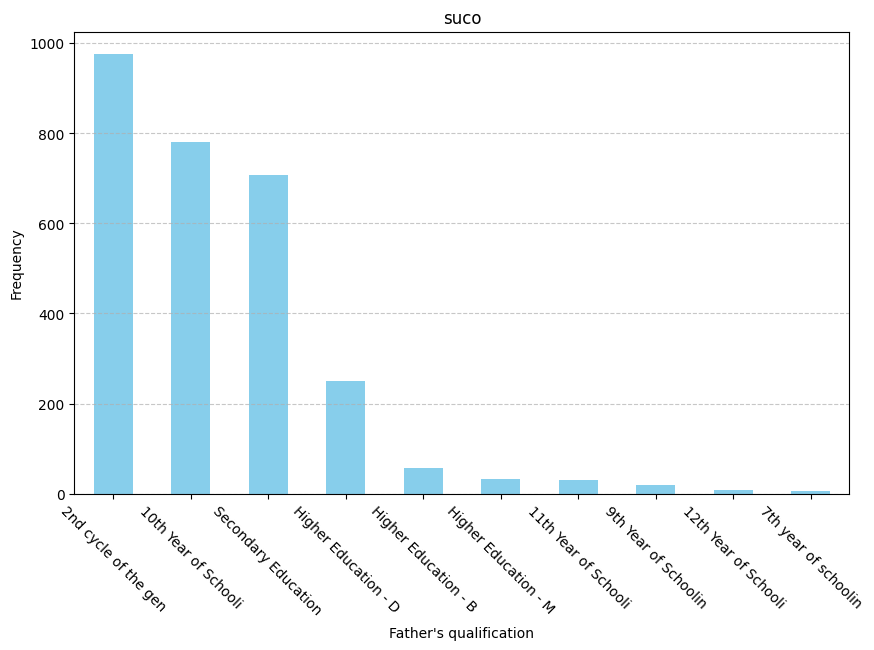

In [16]:
father_quali_legend = pd.read_csv('data/decode/mother_quali.csv')

plot_freq(X_train, 'Father\'s qualification', father_quali_legend, plt)

## plottando distribuição da variável dependente

<Axes: >

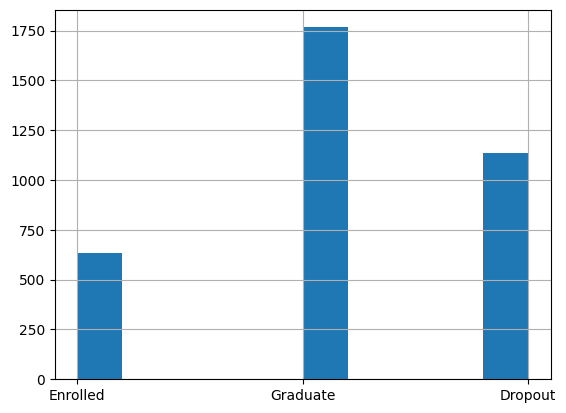

In [17]:
y_train.hist()

## verificando valores nulos

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3539 entries, 1072 to 1939
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3539 non-null   int64  
 1   Application mode                                3539 non-null   int64  
 2   Application order                               3539 non-null   int64  
 3   Course                                          3539 non-null   int64  
 4   Daytime/evening attendance                      3539 non-null   int64  
 5   Previous qualification                          3539 non-null   int64  
 6   Nacionality                                     3539 non-null   int64  
 7   Mother's qualification                          3539 non-null   int64  
 8   Father's qualification                          3539 non-null   int64  
 9   Mother's occupation                        

## hybrid approach

In [19]:
tl = TomekLinks(sampling_strategy='majority')
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [20]:
sm = SMOTE(sampling_strategy='not majority')
X_train_tl_sm, y_train_tl_sm = sm.fit_resample(X_train_tl, y_train_tl)

<Axes: >

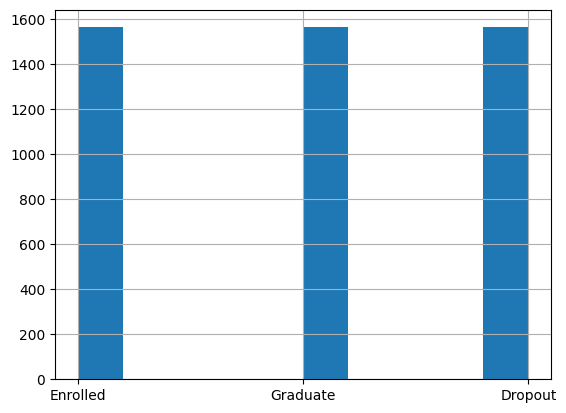

In [21]:
y_train_tl_sm.hist()

In [22]:
X_train_tl_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4692 non-null   int64  
 1   Application mode                                4692 non-null   int64  
 2   Application order                               4692 non-null   int64  
 3   Course                                          4692 non-null   int64  
 4   Daytime/evening attendance                      4692 non-null   int64  
 5   Previous qualification                          4692 non-null   int64  
 6   Nacionality                                     4692 non-null   int64  
 7   Mother's qualification                          4692 non-null   int64  
 8   Father's qualification                          4692 non-null   int64  
 9   Mother's occupation                      

In [23]:
X_train_tl_sm.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,...,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000
mean,1.166240,7.003410,1.644075,9.785166,0.873828,2.510656,1.236786,12.181159,16.391731,7.300298,...,0.120205,0.458440,6.065004,8.179668,4.022379,10.071092,0.140452,11.484870,1.202461,0.047278
std,0.576734,5.253902,1.223796,4.282834,0.332079,3.911035,1.668161,9.073094,11.089816,4.114589,...,0.641127,1.752599,2.069830,3.899711,2.854932,5.147083,0.721572,2.573631,1.317598,2.183426
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.689946,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,4.000000,12.000000,0.000000,11.100000,1.172880,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,6.000000,10.000000,6.000000,13.165646,0.000000,12.987932,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,20.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [24]:
X_train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,...,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,1.179712,6.894886,1.719695,9.868324,0.891777,2.571913,1.249223,12.295846,16.485730,7.296411,...,0.130828,0.539418,6.223509,8.054818,4.423566,10.226210,0.145521,11.585476,1.226618,-0.002142
std,0.610281,5.306728,1.311119,4.346452,0.310705,4.009614,1.733045,9.067788,11.028049,3.995548,...,0.667934,1.913864,2.193843,3.951421,3.009598,5.226452,0.743933,2.672804,1.381857,2.267525
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.375000,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,20.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [25]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df[['Mother\'s occupation']])

X_train_tl_sm_enc = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Mother\'s occupation']))

X_train_tl_sm_enc.head()

,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,...,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Mother's occupation_32
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train_tl_sm_enc.columns

Index(['Mother's occupation_1', 'Mother's occupation_2',
       'Mother's occupation_3', 'Mother's occupation_4',
       'Mother's occupation_5', 'Mother's occupation_6',
       'Mother's occupation_7', 'Mother's occupation_8',
       'Mother's occupation_9', 'Mother's occupation_10',
       'Mother's occupation_11', 'Mother's occupation_12',
       'Mother's occupation_13', 'Mother's occupation_14',
       'Mother's occupation_15', 'Mother's occupation_16',
       'Mother's occupation_17', 'Mother's occupation_18',
       'Mother's occupation_19', 'Mother's occupation_20',
       'Mother's occupation_21', 'Mother's occupation_22',
       'Mother's occupation_23', 'Mother's occupation_24',
       'Mother's occupation_25', 'Mother's occupation_26',
       'Mother's occupation_27', 'Mother's occupation_28',
       'Mother's occupation_29', 'Mother's occupation_30',
       'Mother's occupation_31', 'Mother's occupation_32'],
      dtype='object')